In [1]:
import pandas as pd
#import pandas_profiling as pdp
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

np.random.seed(220409)

In [2]:
#df = pd.read_csv("drive/MyDrive/Colab Notebooks/SNA.csv")
df = pd.read_csv("data/SNA.csv")
df.tail()

,Unnamed: 0,Unnamed: 1,NDI,C
107,NaN,Q4,114442.5,106077.7
108,2021.0,Q1,106817.6,98991.7
109,NaN,Q2,NaN,NaN
110,NaN,Q3,NaN,NaN
111,NaN,Q4,NaN,NaN


In [3]:
df = df.drop(df.columns[[0,1]], axis = 1).dropna()
df.tail()
#pdp.ProfileReport(df)

,NDI,C
104,106615.8,101029.3
105,98556.2,97528.8
106,99273.8,98048.2
107,114442.5,106077.7
108,106817.6,98991.7


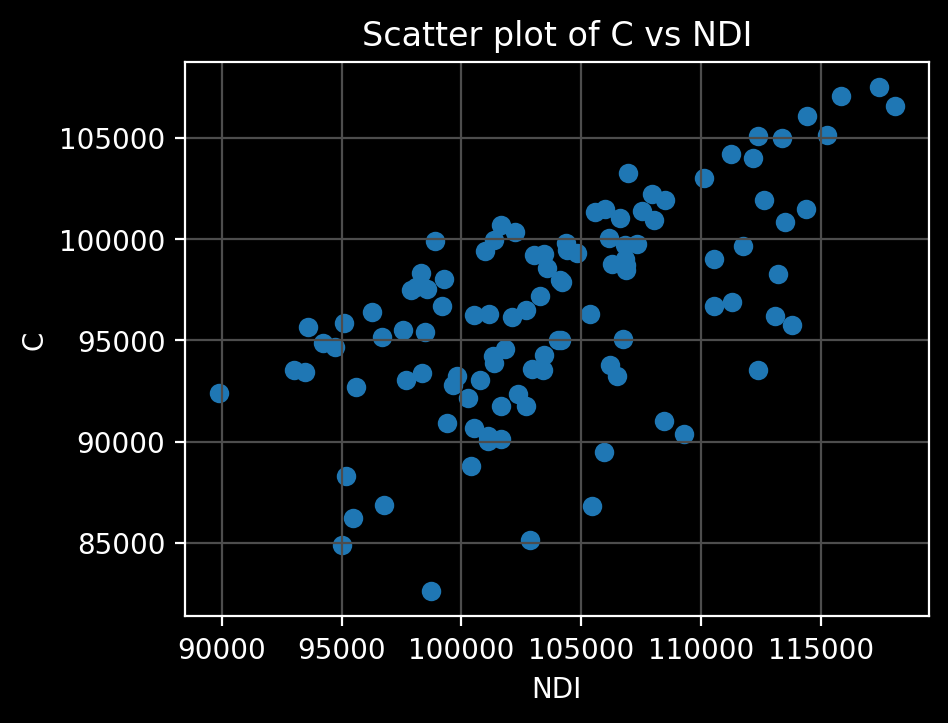

In [4]:
%matplotlib inline
plt.scatter(df[["NDI"]], df[["C"]])
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

In [5]:
X = df[["NDI"]].values
Y = df[["C"]].values

X = sm.add_constant(X)     #切片付きOLSを実施
model_ols = sm.OLS(Y, X)   #
fit_ols = model_ols.fit()  #
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     61.95
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.05e-12
Time:                        21:16:13   Log-Likelihood:                -1058.6
No. Observations:                 109   AIC:                             2121.
Df Residuals:                     107   BIC:                             2127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         4.4e+04   6679.109      6.587      0.0

ValueError: x and y must be the same size

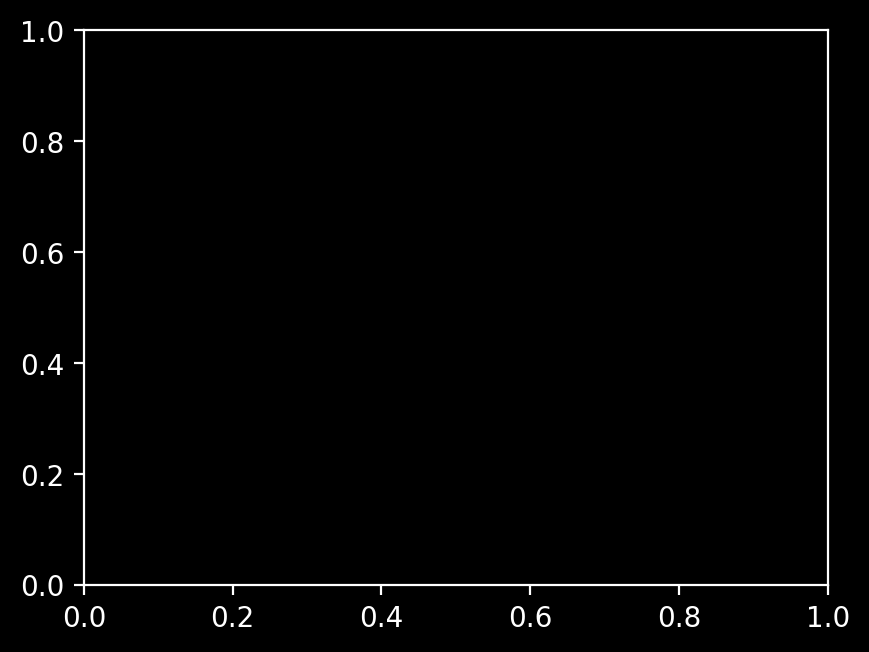

In [6]:
plt.scatter(X, Y)
plt.plot(X, fit_ols.predict(), color = "red")
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

In [ ]:
plt.hist(fit_ols.resid)

In [ ]:
model_gls = sm.GLS(Y, X)
fit_gls = model_gls.fit()
print(fit_gls.summary())